In [2]:
#import thinkplot
#import thinkstats2
import pandas as pd
import numpy as np
import math
import scipy.stats as ss
import thinkplot
import thinkstats2
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

##Seaborn for fancy plots. 
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams["figure.figsize"] = (15,5)

# DATA 3450 Project
Group 1: Chuan Yong Guo, Sijia Hao, Prajesh Patel

### Insurance Costs In America

One of the primary concern many Americans face today with respect to their health is the cost of health insurance. The cost of health insurance varies from person to person, and is affected by multiple factors. The average citizen living in the United States of America can expect to pay around $456 - $1152 per month for health insurance. The cost of health insurance is affected by a number of demographics, such as a person's age, location, tobacco usage, and whether they have a family of not. The purpose of this project is to determine if a person's demographics can be used to predict the cost of health insurance. The predicted cost of health insurance can be used as one indication of the person's overall health. The question we aim to answer is: What do our demographics tell us about our health?

### Explanatory Data Analysis

In order to predict insurance charges, we will be using a dataset with demographic information for American citizens. below details the step by step procedure of explanatory data analysis performed to prepare the dataset for modelling. 
1. Visualize distributions of features

In [106]:
corr = df.corr()
corr.style.background_gradient().set_precision(2)

C:\Users\billg\AppData\Local\Temp\ipykernel_14216\2360562265.py:2: FutureWarning: this method is deprecated in favour of `Styler.format(precision=..)`
  corr.style.background_gradient().set_precision(2)


,age,bmi,children,charges
age,1.00,0.11,0.04,0.30
bmi,0.11,1.00,0.01,0.20
children,0.04,0.01,1.00,0.07
charges,0.30,0.20,0.07,1.00


In [3]:
df = pd.read_csv("insurance.csv")
df.head()


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


<AxesSubplot:xlabel='smoker', ylabel='Count'>

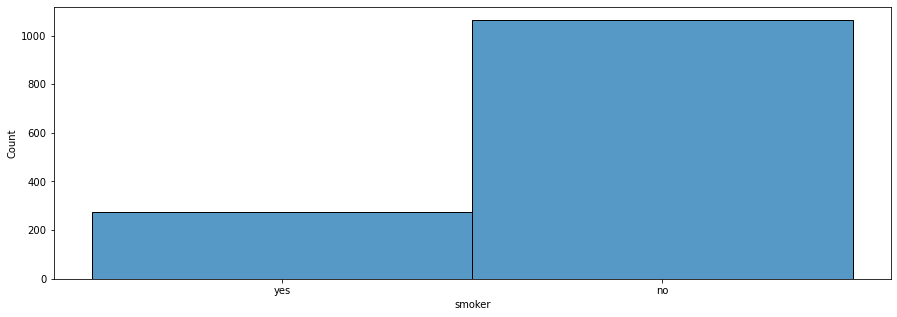

In [12]:
sns.histplot(df['smoker'])

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


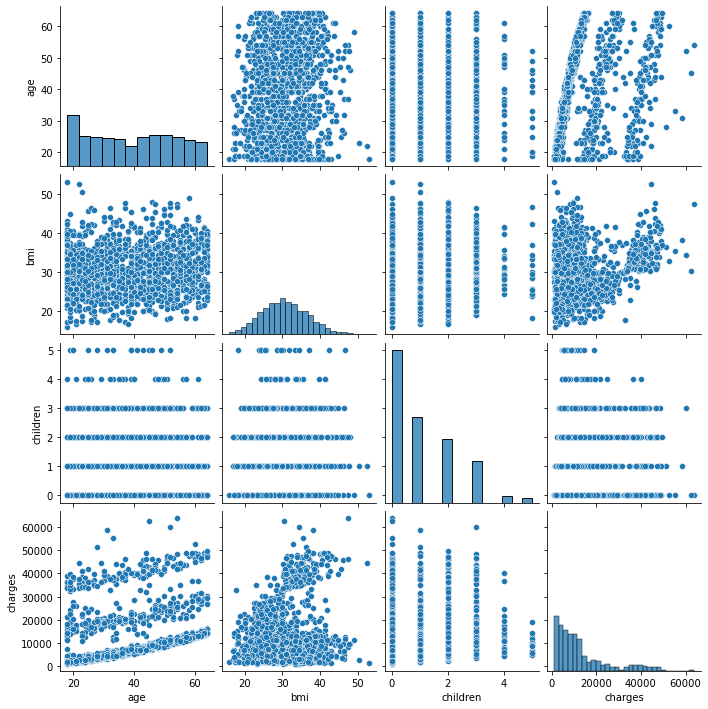

In [5]:
sns.pairplot(df)

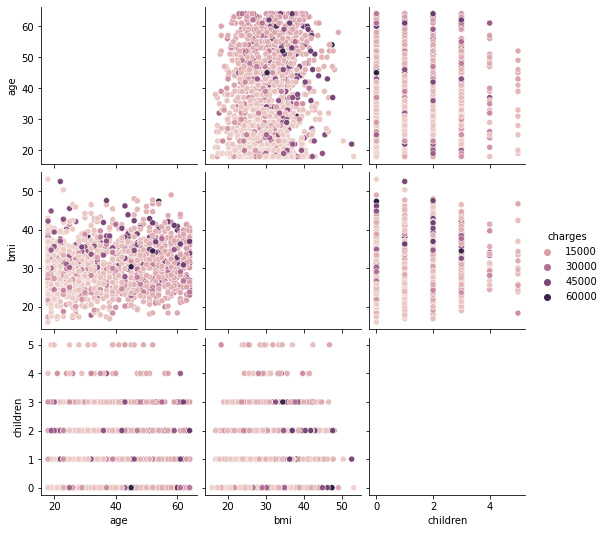

In [6]:
sns.pairplot(df, hue = 'charges')

In [115]:
df = pd.read_csv("insurance.csv")

In [116]:
df=df[df['region']=='southwest']

In [117]:
df=pd.get_dummies(df)

In [118]:
df

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_southwest
0,19,27.9,0,16884.92400,1,0,0,1,1
12,23,34.4,0,1826.84300,0,1,1,0,1
15,19,24.6,1,1837.23700,0,1,1,0,1
18,56,40.3,0,10602.38500,0,1,1,0,1
19,30,35.3,0,36837.46700,0,1,0,1,1
...,...,...,...,...,...,...,...,...,...
1316,19,20.6,0,1731.67700,1,0,1,0,1
1329,52,38.6,2,10325.20600,0,1,1,0,1
1331,23,33.4,0,10795.93733,1,0,1,0,1
1332,52,44.7,3,11411.68500,1,0,1,0,1


In [119]:
y = np.array(df["charges"]).reshape(-1,1)
y.shape
df_ = df.drop(columns=["charges"])
df_.head()
x = np.array(df_)
x.shape

#Split and train
xTrain, xTest, yTrain, yTest = train_test_split(x,y,test_size=.3)

#Generate model
model = LinearRegression().fit(xTrain,yTrain)

#Get RMSE and R-squared
r_sq = model.score(xTest, yTest)
print('R-squared:', r_sq)

tmp = model.predict(xTest)
print('RMSE:', mean_squared_error(tmp, yTest, squared=False))

#Get Y-intercept and Coefficients
print('Intercept:', model.intercept_[0])
print('Coefs:', model.coef_[0])

R-squared: 0.735309098681348
RMSE: 6376.525237888193
Intercept: 4203.992443602208
Coefs: [   261.66995964    199.86522608    153.49740158    140.47426594
   -140.47426594 -13096.10713798  13096.10713798      0.        ]
